# PyTorch Computer Vision

## 0. Computer vision libraries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - pretrained computer vision models to use for own problems
* `torchvision.transforms` - functions for manipulating vision data (images) to be suitable for use with an ML model
* `torch.utils.data.Dataset` - base dataset class for PyTorch
* `torch.utils.data.DataLoader` - creates a Python iterable over a dataset

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.6.0+cu124
0.21.0+cu124


## 1. Getting a dataset

The dataset we use is FashionMNIST.

In [2]:
train_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=True, # training data
    download=True, # download data (if does not exist on disk)
    transform=ToTensor(), # transform images to tensor format
    target_transform=None # how to transform labels?
)

test_data = datasets.FashionMNIST(
    root="data", # where to download data to
    train=False, # test data
    download=True, # download data (if does not exist on disk)
    transform=ToTensor(), # transform images to tensor format
    target_transform=None # how to transform labels?
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.9MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.75MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.4MB/s]


In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# Let's see first example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [8]:
print(f"Image shape: {image.shape} -> [color channels, height, width]")
print(f"Image label: {label} -> {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color channels, height, width]
Image label: 9 -> Ankle boot


### 1.2 Visualizing the data

Image shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

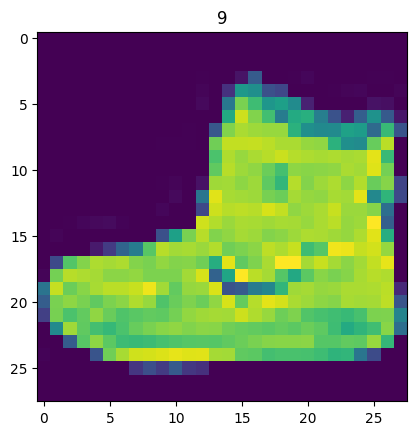

In [9]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()); # removed colour channel
plt.title(label)

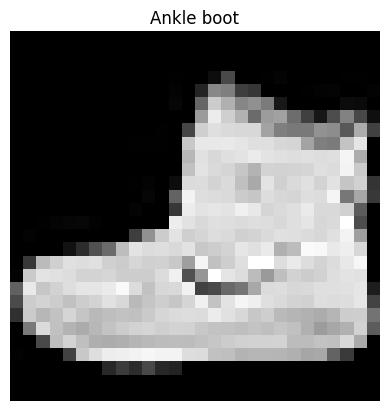

In [10]:
plt.imshow(image.squeeze(), cmap="gray");
plt.title(class_names[label]);
plt.axis(False);

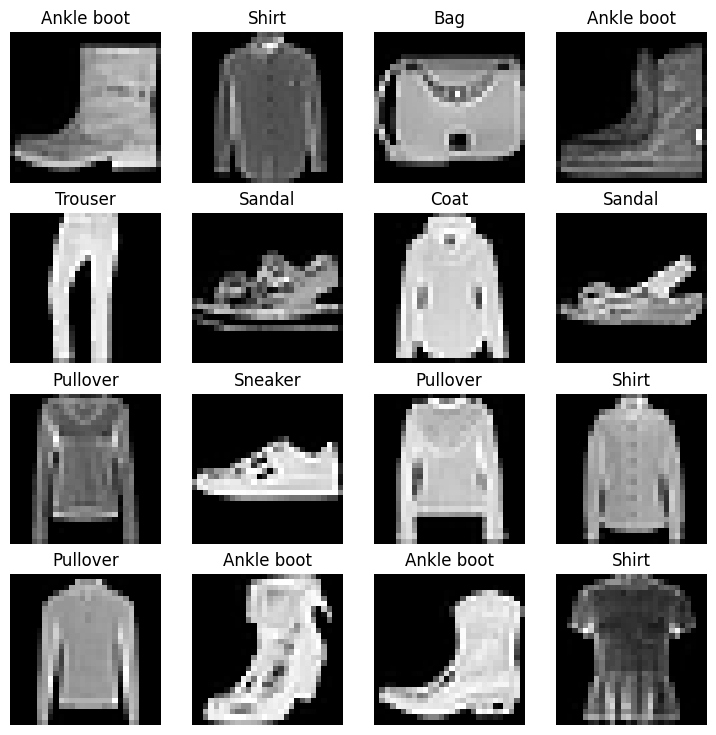

In [11]:
# Plotting more...

torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0,len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [12]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Currently, we have PyTorch Datasets. DataLoader turns them to Python iterables; more specifically, we turn the data into (mini-)batches. Why?

1. More computationally efficient - the hardware may not be able to look at 60 000 images in one hit. So, we break it to a smaller value (now 32).
2. It gives the neural network more chances to update the gradients per epoch.

In [13]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

# datasets into iterables
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False) # easier to evaluate without shuffling

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x786311693b90>,
 <torch.utils.data.dataloader.DataLoader at 0x78631c2069d0>)

In [14]:
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x786311693b90>, <torch.utils.data.dataloader.DataLoader object at 0x78631c2069d0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [15]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


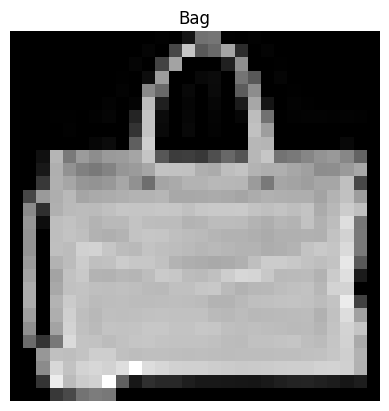

In [16]:
# Show a sample
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: A baseline model

Usually, the best way to start an ML problem is to use a baseline model.

In [17]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape

# Flatten the sample
output = flatten_model(x) # forward pass
print(f"Start shape: {x.shape}\nFlattened image size: {output.shape}")

Start shape: torch.Size([1, 28, 28])
Flattened image size: torch.Size([1, 784])


In [18]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
        )

  def forward(self, x):
    return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape=784, # 28*28
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # how many classes
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [20]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

### 3.1 Loss function, optimizer and evaluation metrics

* Loss function - multi class data -> `nn.CrossEntropyLoss()`
* Optimizer - `torch.optim.SGD()` still works
* Evaluation metric - classification problem -> accuracy

In [21]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [22]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments

ML is very experimental --> usually we want to track
1. Model's performance (loss, accuracy etc)
2. How fast it runs?

In [23]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints the difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [24]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device="cpu")

Train time on cpu: 0.000 seconds


2.5138000012248085e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss *per batch*
4. Check what's happening
5. Time it all (for fun)

In [25]:
for batch, (X, y) in enumerate(train_dataloader):
  print(batch, X, y)

Striimattava tuloste lyhennetty viimeiseen 5000 riviin.
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]]]) tensor([0, 5, 2, 1, 2, 7, 0, 5, 3, 3, 7, 7, 0, 2, 3, 7, 3, 3, 0, 2, 8, 4, 2, 7,
        7, 7, 3, 8, 4, 4, 3, 5])
1786 tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000

In [26]:
len(train_dataloader)

1875

In [27]:
# Import tqdm progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

# Train and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")

  ### Training
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)
    loss = loss_fn(y_pred, y) # loss per batch
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  train_loss /= len(train_dataloader) # avg batch loss

  ### Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader) # again, per batch
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04
Epoch: 1
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20
Epoch: 2
-------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43
Train time on cpu: 24.678 seconds


## 4. Make predictions and get model_0 results

In [28]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader) # per batch
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,  # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## 5. Setup device-agnostic code

In [29]:
!nvidia-smi

Wed Jul 16 10:31:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [30]:
torch.cuda.is_available()

True

In [31]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: A better, non-linear model

In [32]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [33]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # 28*28
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Loss, optimizer and evaluation metrics

In [34]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

### 6.2 Functionizing training and evaluation loops

In [35]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device):
  """Performs a training step with model trying to learn on data_loader."""

  train_loss, train_acc = 0, 0
  model.train()

  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y) # loss per batch
    train_loss += loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f} %")

In [36]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.4f} - Test acc: {test_acc:.2f}%\n")

In [37]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

# let's use the new functions!

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 1.09199 | Train acc: 61.34 %
Test loss: 0.9564 - Test acc: 65.00%

Epoch: 1
-------
Train loss: 0.78101 | Train acc: 71.93 %
Test loss: 0.7223 - Test acc: 73.91%

Epoch: 2
-------
Train loss: 0.67027 | Train acc: 75.94 %
Test loss: 0.6850 - Test acc: 75.02%

Train time on cuda: 28.098 seconds


About GPU... https://horace.io/brrr_intro.html


In [38]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader) # per batch
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,  # only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

In [39]:
# Get model 1 results
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building a convolutional Neural Network (CNN)

CNN's are also known as ConvNets. They are useful for finding patterns in visual data.

In [40]:
# Let's create a CNN
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture replicating the TinyVGG model from CNN explainer website.
  """
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential( # conv layer
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculate this...
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of conv block one: {x.shape}")
    x = self.conv_block_2(x)
    #print(f"Output shape of conv block 2: {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")
    return x

In [41]:
image.shape # b&w images -> one color channel

torch.Size([1, 28, 28])

In [42]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # 1 color channel
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [43]:
rand_image_tensor = torch.rand(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [44]:
# Pass through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0372, -0.0748,  0.0573, -0.0396, -0.0098,  0.0194, -0.0003, -0.0114,
          0.0206,  0.0003]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

In [45]:
torch.manual_seed(42)

# creating a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.

In [46]:
test_image.shape

torch.Size([3, 64, 64])

In [47]:
torch.manual_seed(42)

# Create a single Conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3), # (3 would be enough)
                       stride=1,
                       padding=0)

# Pass the data through
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

### 7.2 Stepping through `nn.MaxPool2d()`

In [48]:
test_image.shape

torch.Size([3, 64, 64])

In [49]:
# Print out original image shape
print(f"Original shape: {test_image.shape}\n")

# Create a MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2,
                              stride=2)

# Pass the data through
test_image_trough_conv = conv_layer(test_image)
print(f"Shape after conv layer: {test_image_trough_conv.shape}\n")
output = max_pool_layer(test_image_trough_conv)
print(f"Shape after conv and maxpool layer: {output.shape}")

Original shape: torch.Size([3, 64, 64])

Shape after conv layer: torch.Size([10, 62, 62])

Shape after conv and maxpool layer: torch.Size([10, 31, 31])


In [50]:
# Testing with smaller tensors...
torch.manual_seed(42)

random_tensor = torch.randn(size=(1, 1, 2, 2))
max_pool_layer = nn.MaxPool2d(kernel_size=2,
                              stride=2)
output = max_pool_layer(random_tensor)
print(f"Random tensor:\n{random_tensor}\n")
print(f"Random tensor shape:\n{random_tensor.shape}\n")
print(f"Max pool layer output: {output}\n")
print(f"Max pool layer output shape: {output.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

Random tensor shape:
torch.Size([1, 1, 2, 2])

Max pool layer output: tensor([[[[0.3367]]]])

Max pool layer output shape: torch.Size([1, 1, 1, 1])


### 7.3 Setup a loss function and optimizer for `model_2`

In [51]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)


### 7.4 Training and testing `model_2` with our functions

In [52]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.59544 | Train acc: 78.43 %
Test loss: 0.3970 - Test acc: 85.55%

Epoch: 1
-------
Train loss: 0.35992 | Train acc: 87.01 %
Test loss: 0.3549 - Test acc: 86.86%

Epoch: 2
-------
Train loss: 0.32417 | Train acc: 88.21 %
Test loss: 0.3294 - Test acc: 87.86%

Train time on cuda: 34.829 seconds


In [53]:
# Get model 2 results
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3293975591659546,
 'model_acc': 87.8594249201278}

## 8. Compare model results and train time


In [54]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.329398,87.859425


In [55]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                     total_train_time_model_1,
                                     total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,24.678468
1,FashionMNISTModelV1,0.685001,75.019968,28.098164
2,FashionMNISTModelV2,0.329398,87.859425,34.828633


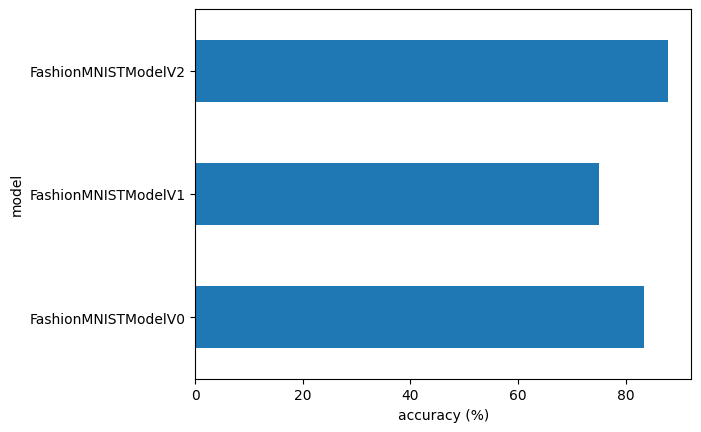

In [56]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)");
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model

In [57]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)
      pred_logit = model(sample) # raw logits
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # to probabilities
      pred_probs.append(pred_prob.cpu()) # cpu for matplotlib
  return torch.stack(pred_probs) # turn list into a tensor


In [58]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [59]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9): # sampling 9 random samples
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

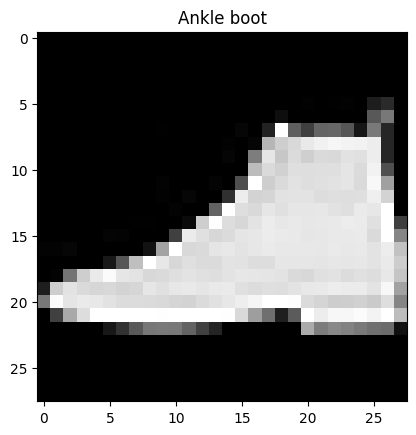

In [60]:
plt.imshow(test_samples[0].squeeze(), cmap="gray");
plt.title(class_names[test_labels[0]]);

In [61]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# View first 2 pred probs
pred_probs[:2]

tensor([[7.8080e-07, 4.6570e-07, 1.5020e-06, 6.6675e-07, 1.7602e-07, 9.0979e-04,
         5.2910e-07, 1.1366e-02, 6.0989e-04, 9.8711e-01],
        [8.5398e-06, 9.9982e-01, 5.3816e-08, 1.2377e-04, 3.9988e-05, 7.6816e-07,
         1.2223e-06, 6.0610e-07, 4.9462e-07, 1.2013e-07]])

In [62]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 1, 4, 3, 5, 2, 2, 4, 9])

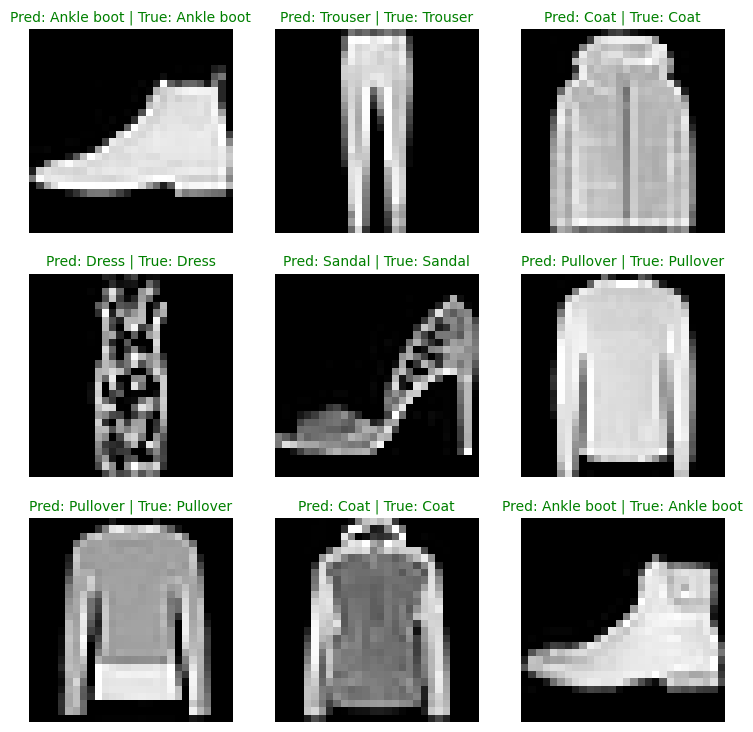

In [63]:
# Plot preds
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  true_label = class_names[test_labels[i]]
  title_text = f"Pred: {pred_label} | True: {true_label}"

  if pred_label == true_label:
    plt.title(title_text,
              fontsize=10,
              color="green")
  else:
    plt.title(title_text,
              fontsize=10,
              color="red")
  plt.axis(False)

## 10. Making a confusion matrix for further prediction evaluation

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix `torchmetrics.ConfusionMatrix`
3. Plot the confusion matrix using `mlextend.plotting.plot_confusion_matrix()`

In [64]:
from tqdm.auto import tqdm

# make preds
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    X, y = X.to(device), y.to(device)
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [66]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


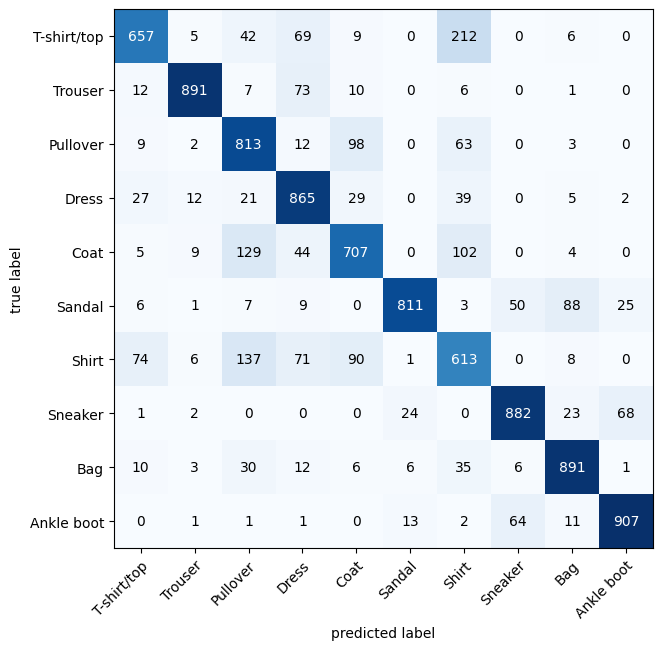

In [67]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# setup confusion instance and compare preds to targets
confmat = ConfusionMatrix(num_classes=len(class_names),
                          task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10, 7))

## 11. Save and load best performing model

In [68]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [69]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# Load in the saved state dict
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [70]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3293975591659546,
 'model_acc': 87.8594249201278}

In [71]:
# Evaluate loaded model
torch.manual_seed(42)
loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader=test_dataloader,
                                    loss_fn=loss_fn,
                                    accuracy_fn=accuracy_fn,
                                    device=device)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3293975591659546,
 'model_acc': 87.8594249201278}

In [72]:
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]))

tensor(True)

## 12. Exercises

In [88]:
train_data = datasets.MNIST(root="data",
                      train=True,
                      download=True,
                      transform=transforms.ToTensor())

test_data = datasets.MNIST(root="data",
                      train=False,
                      download=True,
                      transform=transforms.ToTensor())

class_names = train_data.classes

train_data, test_data

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

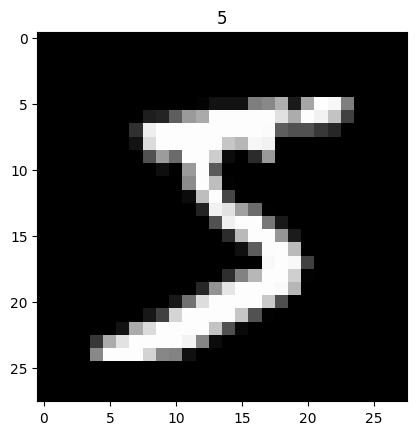

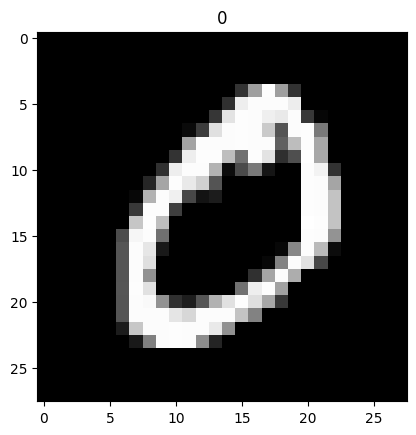

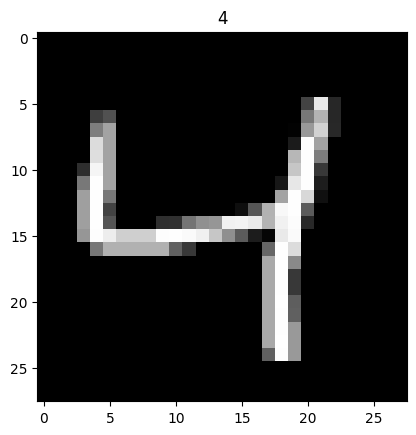

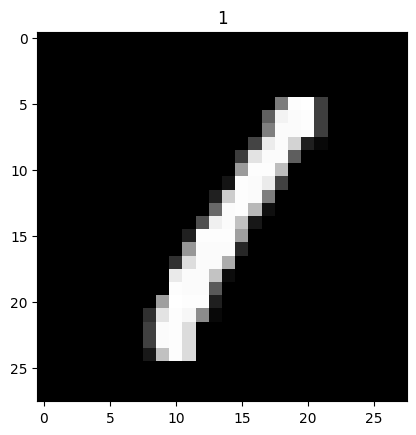

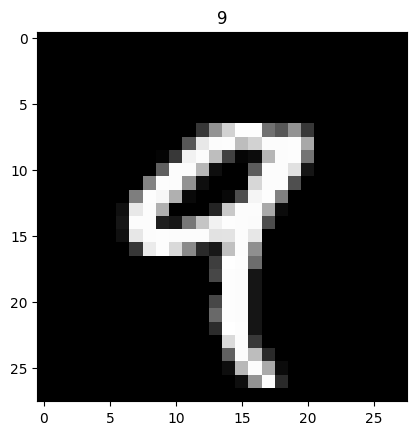

In [75]:
for i in range(5):
  plt.imshow(train_data[i][0].squeeze(), cmap="gray")
  plt.title(train_data[i][1])
  plt.show()

In [76]:
train_dataloader = DataLoader(dataset=train_data,
                               batch_size=32,
                               shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

In [79]:
class MyModel(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

myModel = MyModel(input_shape=1,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

myModel

MyModel(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [85]:
epochs = 3
device = "cuda"
myModel = MyModel(input_shape=1,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=myModel.parameters(),
                            lr=0.1)

start = timer()

for i in tqdm(range(epochs)):
  train_step(myModel,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)
  test_step(myModel,
            test_dataloader,
            loss_fn,
            accuracy_fn,
            device)

end = timer()
time = print_train_time(start, end, device)

device = "cpu"
myModel = MyModel(input_shape=1,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=myModel.parameters(),
                            lr=0.1)

start = timer()

for i in tqdm(range(epochs)):
  train_step(myModel,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)
  test_step(myModel,
            test_dataloader,
            loss_fn,
            accuracy_fn,
            device)

end = timer()
time = print_train_time(start, end, device)

  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.35852 | Train acc: 87.97 %
Test loss: 0.0731 - Test acc: 97.65%

Train loss: 0.07768 | Train acc: 97.65 %
Test loss: 0.0486 - Test acc: 98.37%

Train loss: 0.05784 | Train acc: 98.22 %
Test loss: 0.0578 - Test acc: 98.05%

Train time on cuda: 33.845 seconds


  0%|          | 0/3 [00:00<?, ?it/s]

Train loss: 0.51950 | Train acc: 81.78 %
Test loss: 0.0870 - Test acc: 97.34%

Train loss: 0.08484 | Train acc: 97.42 %
Test loss: 0.0574 - Test acc: 98.31%

Train loss: 0.06235 | Train acc: 98.07 %
Test loss: 0.0626 - Test acc: 98.03%

Train time on cpu: 113.406 seconds


In [90]:
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9): # sampling 9 random samples
  test_samples.append(sample)
  test_labels.append(label)

pred_probs = make_predictions(myModel, test_samples)
pred_classes = pred_probs.argmax(dim=1)



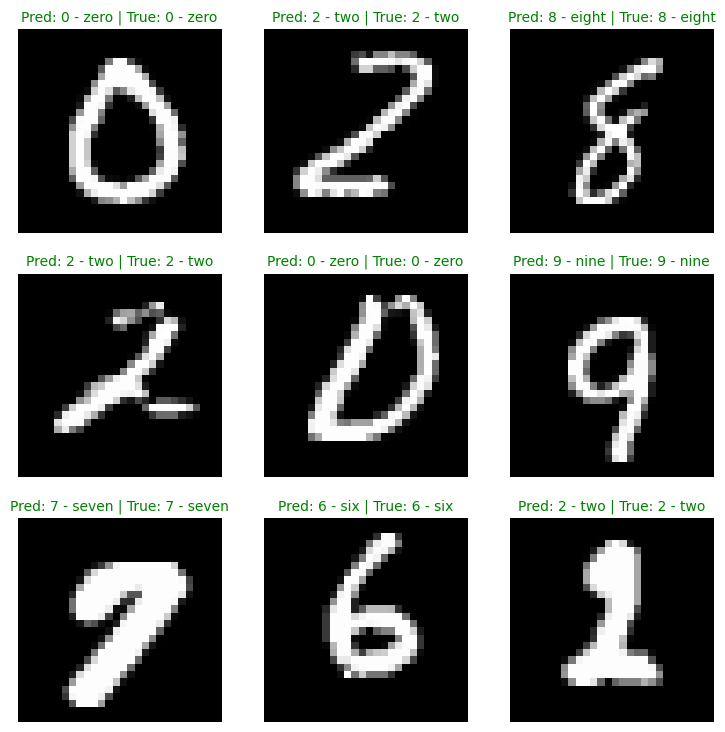

In [94]:
# Plot preds
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  true_label = class_names[test_labels[i]]
  title_text = f"Pred: {pred_label} | True: {true_label}"

  if pred_label == true_label:
    plt.title(title_text,
              fontsize=10,
              color="green")
  else:
    plt.title(title_text,
              fontsize=10,
              color="red")
  plt.axis(False)

In [98]:
# make preds
device = "cuda"
y_preds = []
myModel.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    X, y = X.to(device), y.to(device)
    y_logit = myModel(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([7, 2, 1,  ..., 4, 5, 6])

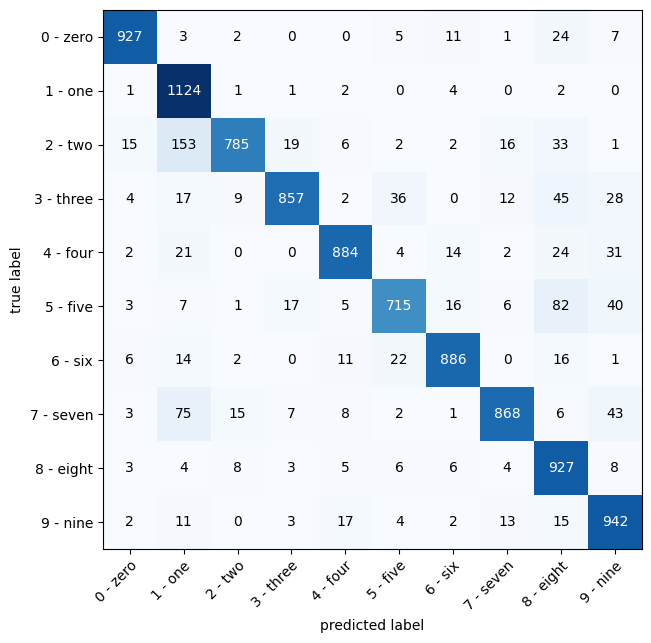

In [99]:
confmat = ConfusionMatrix(num_classes=len(class_names),
                          task='multiclass')

confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10, 7))

In [106]:
rand_tensor = torch.rand(size=(1, 3, 64, 64))
rand_tensor_through_conv = nn.Conv2d(in_channels=3,
                                    out_channels=300,
                                    kernel_size=6,
                                    stride=2,
                                    padding=1)(rand_tensor)
rand_tensor.shape, rand_tensor_through_conv.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1, 300, 31, 31]))

In [130]:
train_data = datasets.FashionMNIST(root="data",
                      train=True,
                      download=True,
                      transform=transforms.ToTensor())

test_data = datasets.FashionMNIST(root="data",
                      train=False,
                      download=True,
                      transform=transforms.ToTensor())

class_names = train_data.classes

train_dataloader = DataLoader(dataset=train_data,
                               batch_size=32,
                               shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             shuffle=False)

myModel = MyModel(input_shape=1,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

In [138]:
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9): # sampling 9 random samples
  test_samples.append(sample)
  test_labels.append(label)

epochs = 3
device = "cuda"

myModel = MyModel(input_shape=1,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=myModel.parameters(),
                            lr=0.1)

for i in tqdm(range(epochs)):
  print(f"Epoch: {i+1}")
  train_step(myModel,
             train_dataloader,
             loss_fn,
             optimizer,
             accuracy_fn,
             device)
  test_step(myModel,
            test_dataloader,
            loss_fn,
            accuracy_fn,
            device)

test_preds = make_predictions(myModel,
                              test_samples)
pred_classes = test_preds.argmax(dim=1)

print(f"Pred class: {pred_classes}")
print(f"True class: {test_labels}")

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1
Train loss: 0.59687 | Train acc: 78.32 %
Test loss: 0.4331 - Test acc: 83.58%

Epoch: 2
Train loss: 0.34803 | Train acc: 87.46 %
Test loss: 0.3604 - Test acc: 86.77%

Epoch: 3
Train loss: 0.31295 | Train acc: 88.63 %
Test loss: 0.3235 - Test acc: 88.35%

Pred class: tensor([2, 9, 4, 9, 3, 5, 3, 6, 7])
True class: [6, 9, 4, 9, 3, 5, 4, 4, 7]


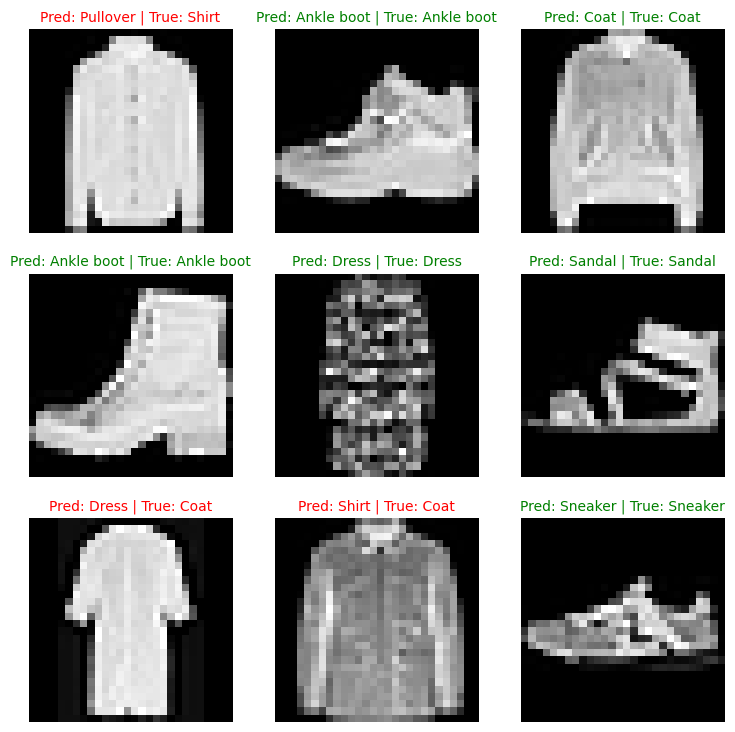

In [139]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i in range(9):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(test_samples[i].squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  true_label = class_names[test_labels[i]]
  title_text = f"Pred: {pred_label} | True: {true_label}"

  if pred_label == true_label:
    plt.title(title_text,
              fontsize=10,
              color="green")
  else:
    plt.title(title_text,
              fontsize=10,
              color="red")
  plt.axis(False)
